In [1]:
import datetime
import math
import matplotlib.pyplot as plt

In [2]:
calendrier_marées = [
    {"date": "20-04-2023", "haute_mer": 2.5, "basse_mer": 0.5},
    {"date": "21-04-2023", "haute_mer": 2.7, "basse_mer": 0.4},
    {"date": "22-04-2023", "haute_mer": 2.4, "basse_mer": 0.6},
]

cycle_lunaire = [
    {"date": "20-04-2023", "phase": "nouvelle_lune"},
    {"date": "21-04-2023", "phase": "premier_quartier"},
    {"date": "22-04-2023", "phase": "pleine_lune"},
    {"date": "23-04-2023", "phase": "dernier_quartier"},
]

In [3]:
def prédire_marée(date, calendrier_marées, cycle_lunaire):
    marée_du_jour = None
    for marée in calendrier_marées:
        if marée["date"] == date:
            marée_du_jour = marée
            break

    if marée_du_jour is None:
        raise ValueError("Date non trouvée dans le calendrier des marées")

    phase_lunaire_du_jour = None
    for cycle in cycle_lunaire:
        if cycle["date"] == date:
            phase_lunaire_du_jour = cycle["phase"]
            break

    if phase_lunaire_du_jour is None:
        raise ValueError("Date non trouvée dans le cycle lunaire")

    if phase_lunaire_du_jour == "nouvelle_lune":
        hauteur_marée = marée_du_jour["haute_mer"]
    elif phase_lunaire_du_jour == "premier_quartier":
        hauteur_marée = marée_du_jour["haute_mer"] * 0.75
    elif phase_lunaire_du_jour == "pleine_lune":
        hauteur_marée = marée_du_jour["haute_mer"] * 1.25
    else:
        hauteur_marée = marée_du_jour["haute_mer"] * 0.5

    return {
        "date": date,
        "hauteur_marée": hauteur_marée,
        "haute_mer": marée_du_jour["haute_mer"],
        "basse_mer": marée_du_jour["basse_mer"],
    }

In [4]:

date = "22-04-2023"
prédiction = prédire_marée(date, calendrier_marées, cycle_lunaire)
print(prédiction)


{'date': '22-04-2023', 'hauteur_marée': 3.0, 'haute_mer': 2.4, 'basse_mer': 0.6}


In [5]:
def prédire_marée_avec_heure(date, calendrier_marées, cycle_lunaire):
    prédiction_journée = prédire_marée(date, calendrier_marées, cycle_lunaire)
    heures = list(range(0, 24))
    hauteurs_marée = []

    for heure in heures:
        if heure < 12:
            hauteur = prédiction_journée["basse_mer"] + (prédiction_journée["haute_mer"] - prédiction_journée["basse_mer"]) * (heure / 12)
        else:
            hauteur = prédiction_journée["haute_mer"] - (prédiction_journée["haute_mer"] - prédiction_journée["basse_mer"]) * ((heure - 12) / 12)
        hauteurs_marée.append(hauteur)

    return heures, hauteurs_marée





In [7]:
def afficher_graphique(date, heures, hauteurs_marée):
    plt.plot(heures, hauteurs_marée)
    plt.xlabel("Heure")
    plt.ylabel("Hauteur de la marée (m)")
    plt.title(f"Prédiction de la hauteur de la marée pour le {date}")
    plt.show()

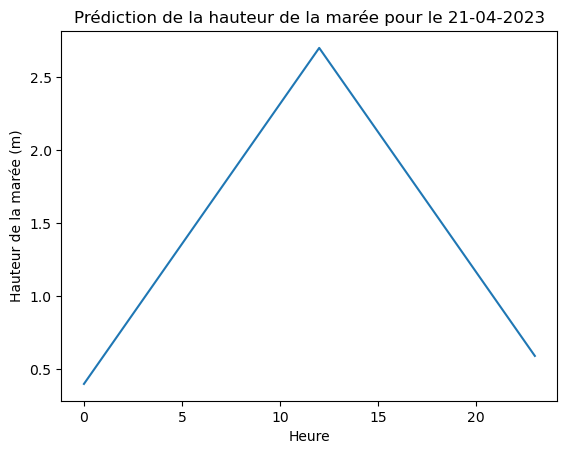

In [8]:

date = "21-04-2023"
heures, hauteurs_marée = prédire_marée_avec_heure(date, calendrier_marées, cycle_lunaire)
afficher_graphique(date, heures, hauteurs_marée)
